# Credit Card Customer Segmentation Project

## About Dataset
This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about `9000 active credit card holders` during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

* `CUST_ID` : Identification of Credit Card holder (Categorical)
* `BALANCE` : Balance amount left in their account to make purchases (
* `BALANCE_FREQUENCY` : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* `PURCHASES` : Amount of purchases made from account
* `ONEOFF_PURCHASES` : Maximum purchase amount done in one-go
* `INSTALLMENTS_PURCHASES` : Amount of purchase done in installment
* `CASH_ADVANCE` : Cash in advance given by the user
* `PURCHASES_FREQUENCY` : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* `ONEOFFPURCHASESFREQUENCY` : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* `PURCHASESINSTALLMENTSFREQUENCY` : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* `CASHADVANCEFREQUENCY` : How frequently the cash in advance being paid
* `CASHADVANCETRX` : Number of Transactions made with "Cash in Advanced"
* `PURCHASES_TRX`: Numbe of purchase transactions made
* `CREDIT_LIMIT` : Limit of Credit Card for user
* `PAYMENTS` : Amount of Payment done by user
* `MINIMUM_PAYMENTS` : Minimum amount of payments made by user
* `PRCFULLPAYMENT` : Percent of full payment paid by user
* `TENURE` : Tenure of credit card service for user




## Project Steps


1. **Import Necessary Libraries**
2. **Exploratory Data Analysis**
3. **Data Preprocessing**
4. **Modeling**
5. **Results**
---














## Importing necessary libraries

In [1]:
!pip install kneed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn import metrics




In [2]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


## EDA

In [3]:
data = pd.read_csv("C:\\Users\\lenovo\\OneDrive\\Documents\\Downloads\\CC GENERAL (1).csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# First column which names CUST_ID, that stands for customer ID, does not reflect any useful information about the data.
data.drop('CUST_ID', axis = 1, inplace = True)

In [6]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Let's plot to become one with the Data

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4504\158852515.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


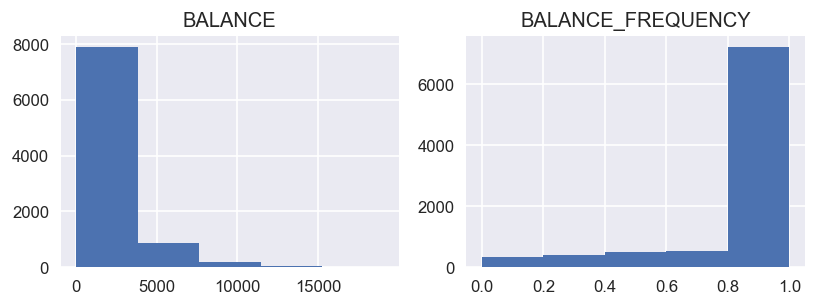

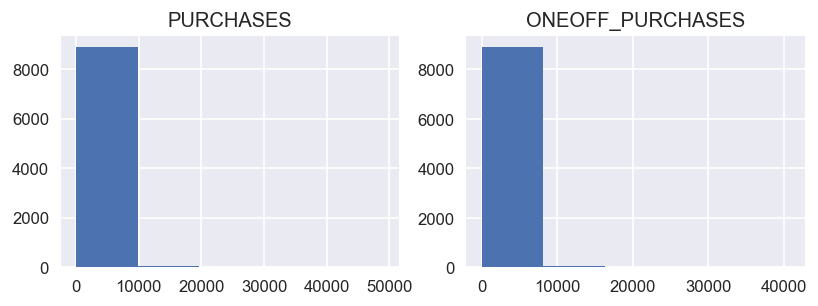

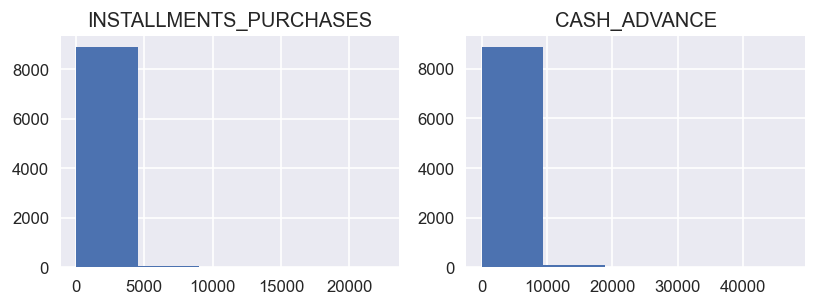

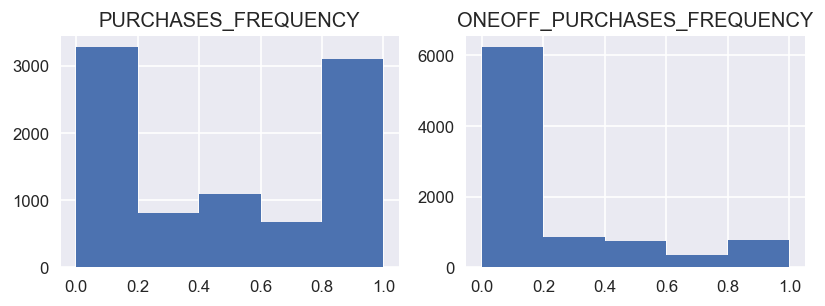

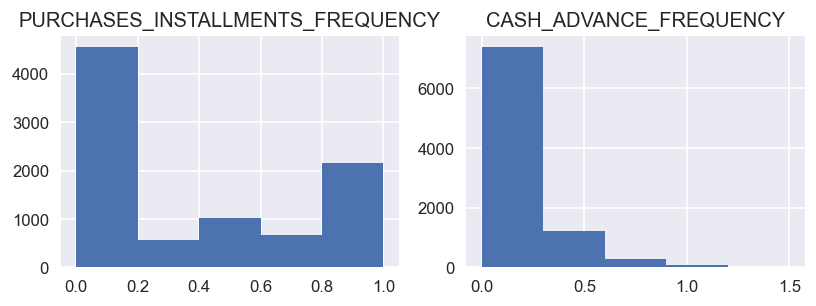

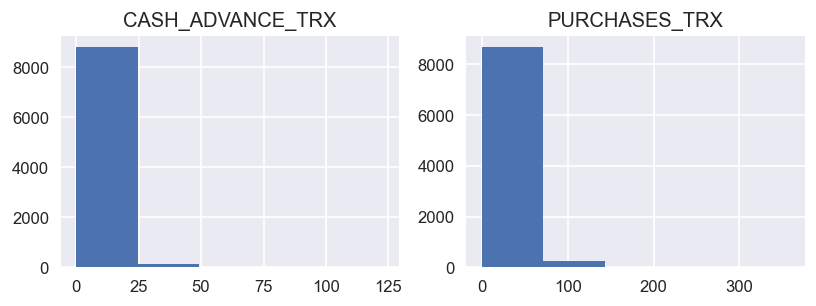

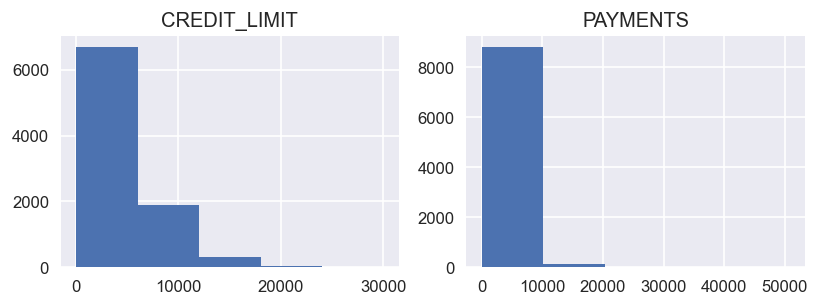

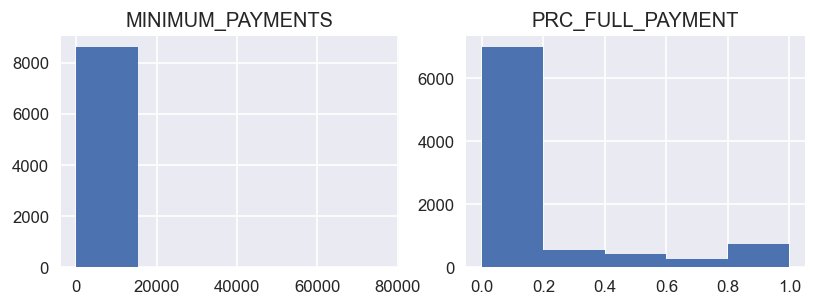

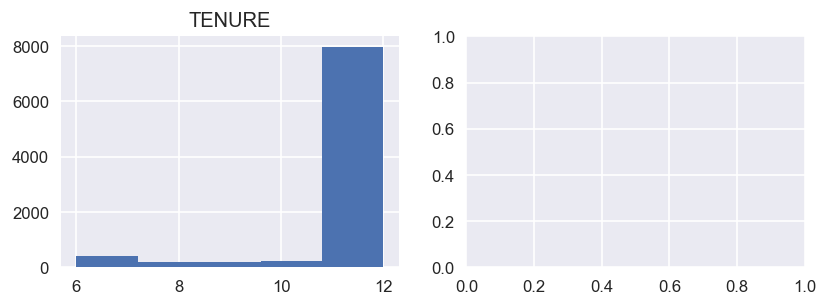

In [7]:
plt.style.use('seaborn')

i = 0
while i < len(data.columns):         #column(11 tak chalega)
    try:
        fig = plt.figure(figsize = (8, 2.5), dpi = 120)   #dpi=between space(overlap nhi hoga)
        plt.subplot(1,2,1)      #(1 row,2 column,1 axis)
        plt.hist(data[data.columns[i]], bins = 5)   
        plt.title(data.columns[i])
        i += 1
        plt.subplot(1,2,2)
        plt.hist(data[data.columns[i]], bins = 5)
        plt.title(data.columns[i])         
        i += 1
    except:
        continue
plt.show()

some features are heavily skewed. As a result, further inspection for finding outliers is a must. Also, usual clustering algorithms might not be efficient enough.

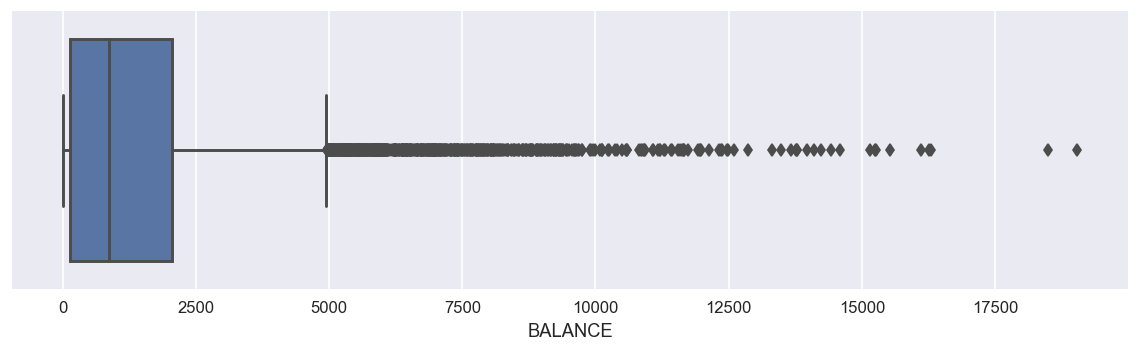

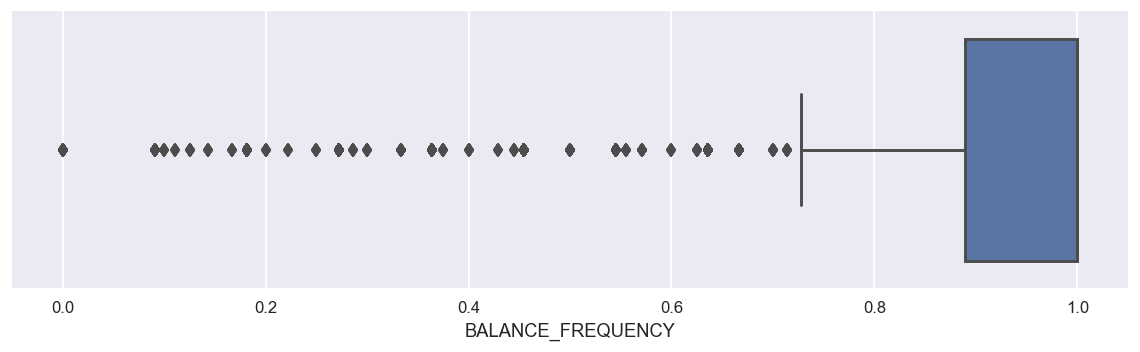

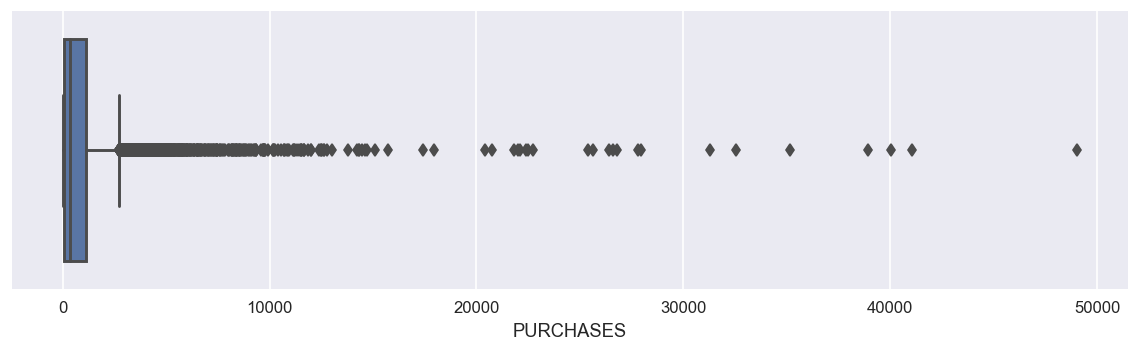

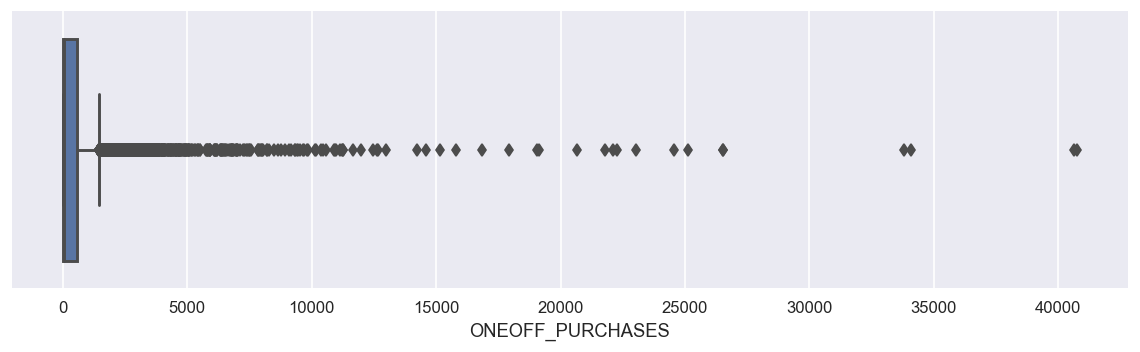

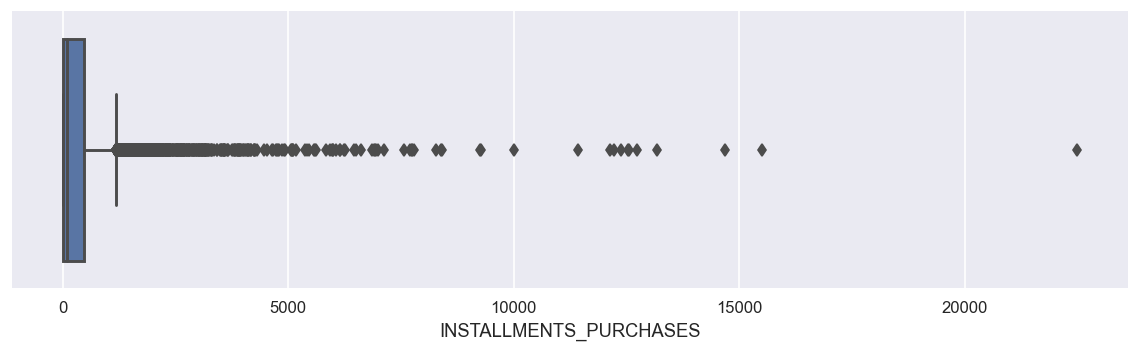

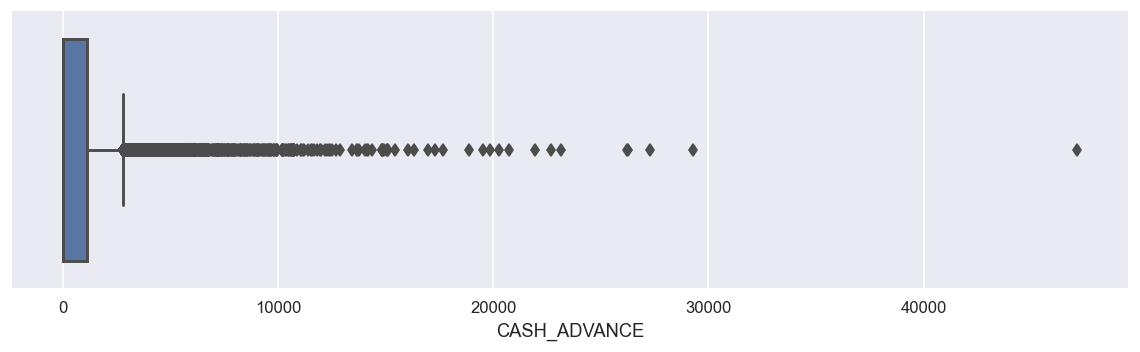

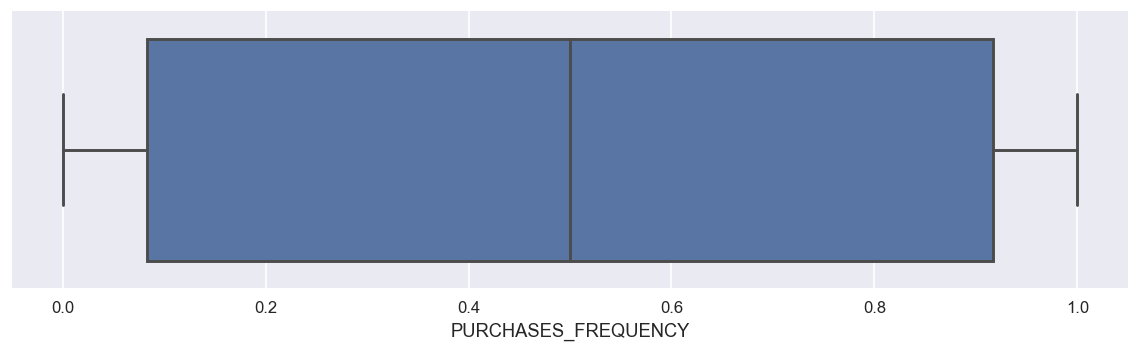

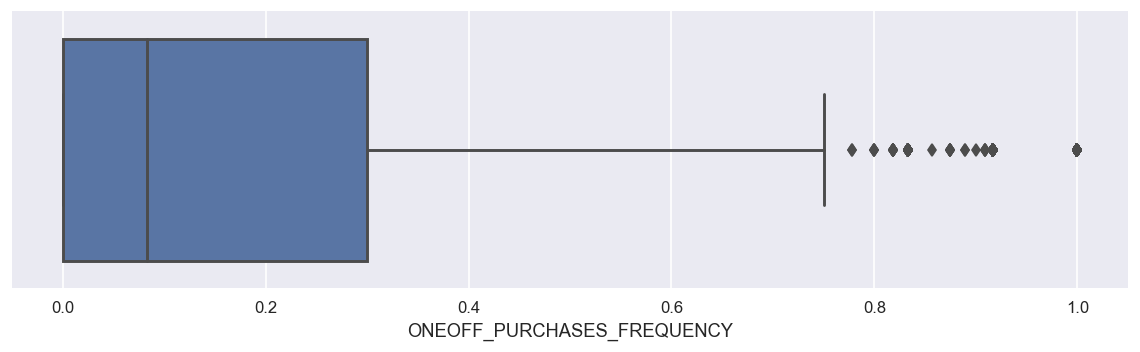

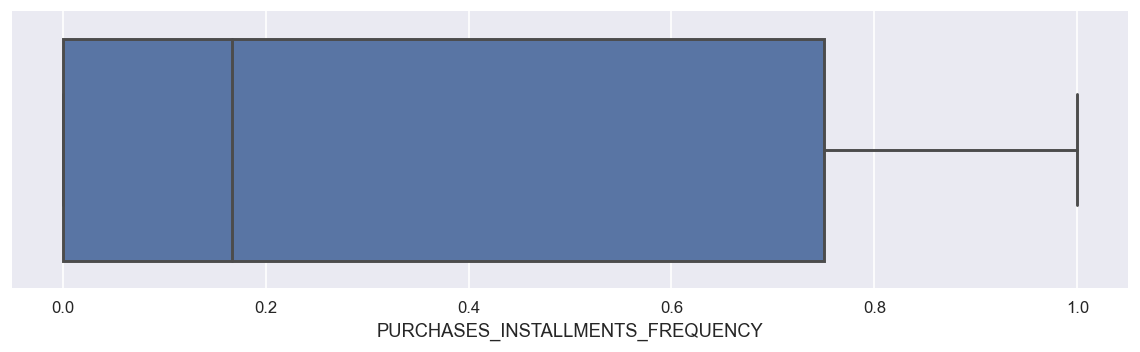

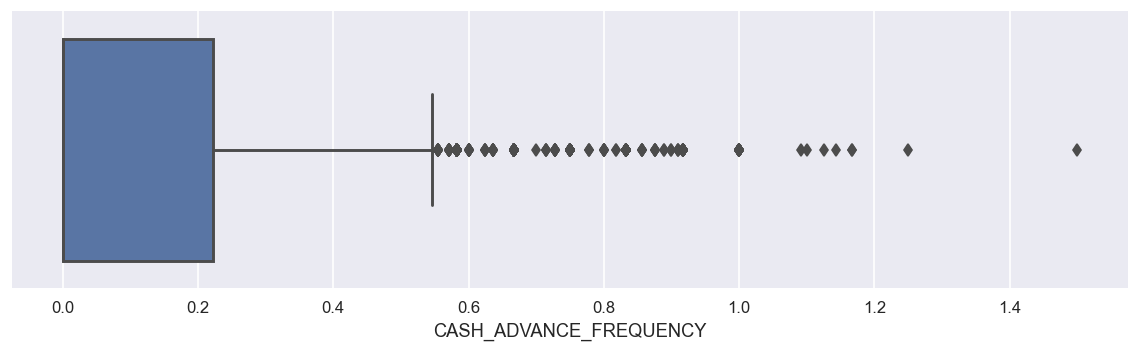

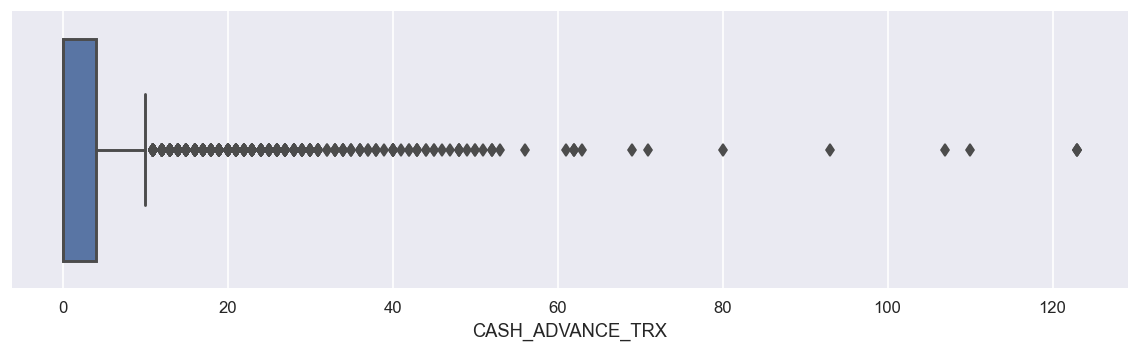

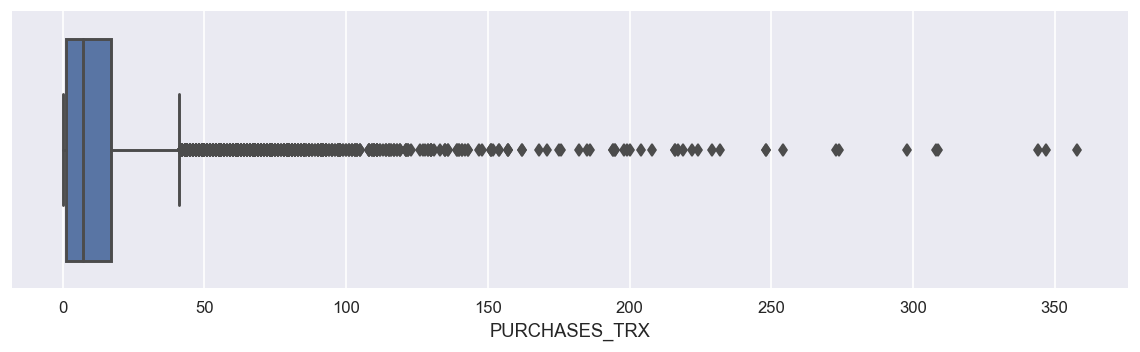

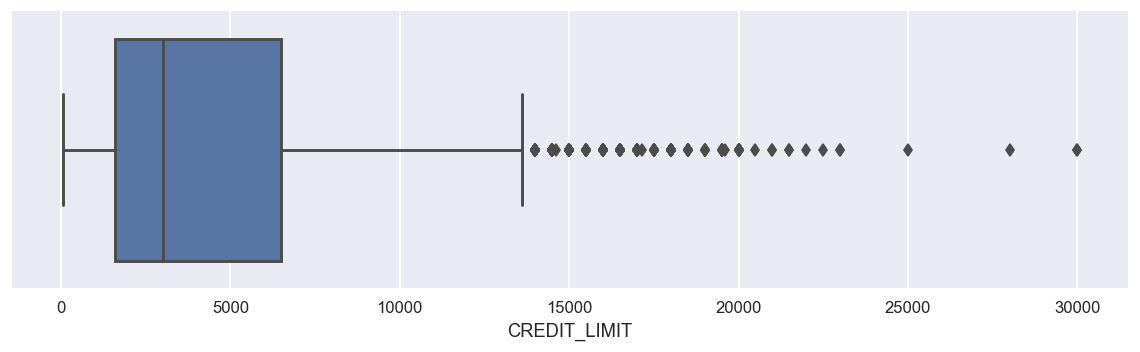

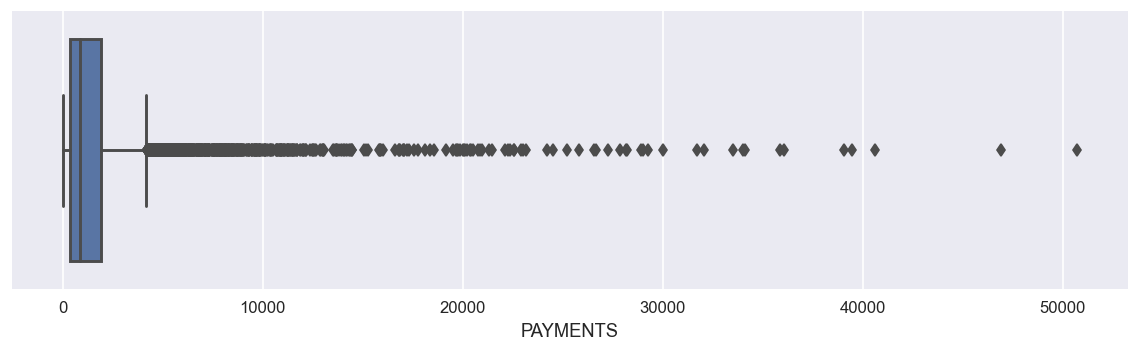

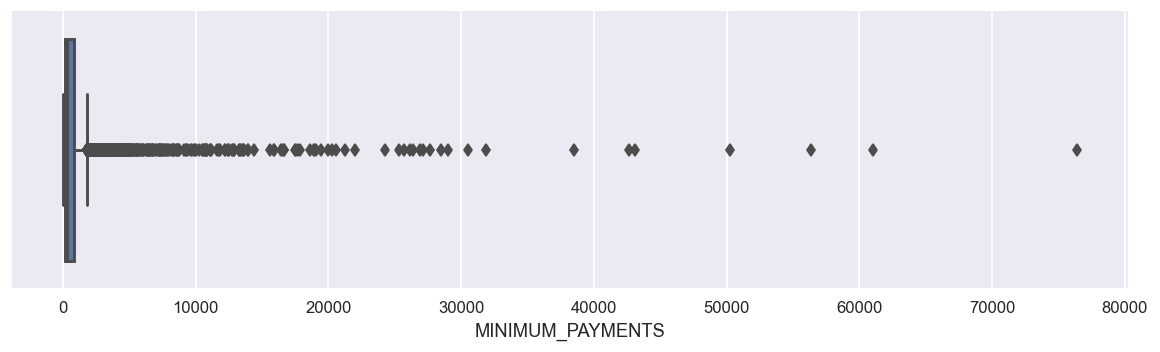

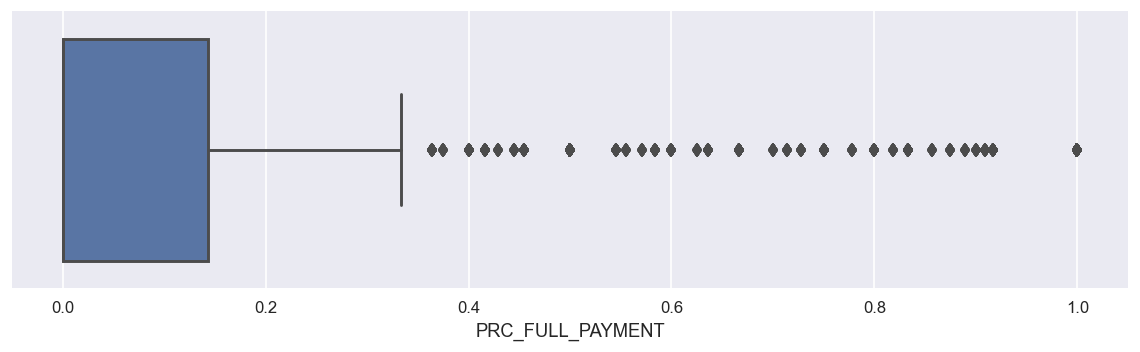

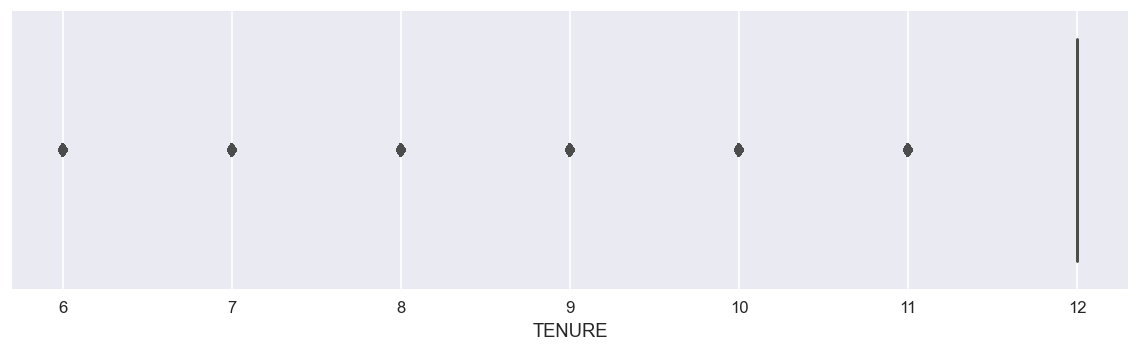

In [8]:
i = 0
while i < len(data.columns):
    try:
        fig = plt.figure(figsize = (12, 3), dpi = 120)
        sns.boxplot(x = data.columns[i], data = data)
        i += 1
    except:
        continue
plt.show()



#BOXPLOT=> NUMERICAL FEATURES 

In [9]:
# skewness:- mean=> left 

In [10]:
#outliner check a boxplot

#### Box Plots Interpretations
- `BALANCE` : There might be some noises as there are outliers which have values more than 17500.

- `BALANCE_FREQUENCY` : There are some values equal to zero, however the distance is not significant.

- `PURCHASES` : Values more than 30000 are outliers, but there is one near 50000 that is suspicious to be a noise.

- `ONEOFF_PURCHASES` : There are some outliers more than 33000.

- `INSTALLMENT_PURCHASES` : A sample with a value more than 20000 might be a noise.

- `CASH_ADVANCE` : A value that is more than 40000 is an outlier and should be inspected.

- `PURCHASES_FREQUENCY` : Values in this column are distributed with balance, and no outlier is on the plot.

- `ONEOFF_PURCHASES_FREQUENCY` : None of the values is as far from the rest as a noise might be.

- `PURCHASES_INSTALLMENT_FREQUENCY` : Also in this column there is a balance in distribution of the samples, and there is not any outlier.

- `CASH_ADVANCE_FREQUENCY` : However the value more than 14 seems like an outlier, but there is a low chance of being a noise.

- `CASH_ADVANCE_TRX` : Most of the values in this column are near "0". So, it should be inspected in relation with other features.

- `PURCHASES_TRX` : Just like CASH_ADVANCE_TRX, an analysis in relation with other features is needed.

- `CREDIT_LIMIT` : Samples equal or above 25000 should be inspected.

- `PAYMENTS` : There are number of outliers with values above 45000.

- `MINIMUM_PAYMENTS` : Values more than 35000 should be reviewed carefully.

- `PRC_FULL_PAYMENT` : There is not any outlier or noise.

- `TENURE` : Values on this column are not continuous.

In [11]:
data.sample(20)   

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1472,27.694103,0.444444,474.96,0.00,474.96,0.000000,0.333333,0.000000,0.222222,0.000000,0,7,7500.0,611.396021,81.113509,1.000000,9
8761,315.388131,1.000000,467.35,40.00,427.35,213.301381,1.000000,0.090909,0.909091,0.090909,3,12,1000.0,329.764112,199.424526,0.100000,11
737,95.865855,0.363636,1123.58,1123.58,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,9,1500.0,3245.496885,142.868781,0.000000,12
7171,142.290756,1.000000,540.00,520.00,20.00,0.000000,0.166667,0.083333,0.083333,0.000000,0,2,4000.0,245.492892,123.488050,0.000000,12
5460,8978.156324,1.000000,482.88,325.52,157.36,72.443790,0.750000,0.500000,0.750000,0.083333,1,15,9500.0,2112.619409,5817.079142,0.000000,12
4946,164.583178,0.454545,1489.28,918.48,570.80,0.000000,0.333333,0.250000,0.250000,0.000000,0,8,3500.0,1858.087268,176.445411,0.000000,12
1466,1995.089853,1.000000,8335.69,7400.85,934.84,0.000000,1.000000,0.818182,0.272727,0.000000,0,69,7000.0,3348.095046,1298.363292,0.000000,11
4491,14.775035,1.000000,80.44,0.00,80.44,0.000000,0.333333,0.000000,0.333333,0.000000,0,4,3000.0,137.217255,81.263818,0.083333,12
8475,72.369731,1.000000,588.00,0.00,588.00,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2500.0,577.946554,183.976319,0.583333,12
4369,54.738397,0.909091,1326.75,0.00,1326.75,0.000000,1.000000,0.000000,1.000000,0.000000,0,30,1500.0,1132.512843,134.186632,0.818182,12


There are four columns with discrete values, for better insight their countplot is being analysed.

- Colummns : `CASH_ADVANCE_TRX`, `PURCHASES_TRX`, `CREDIT_LIMIT`, `TENURE`

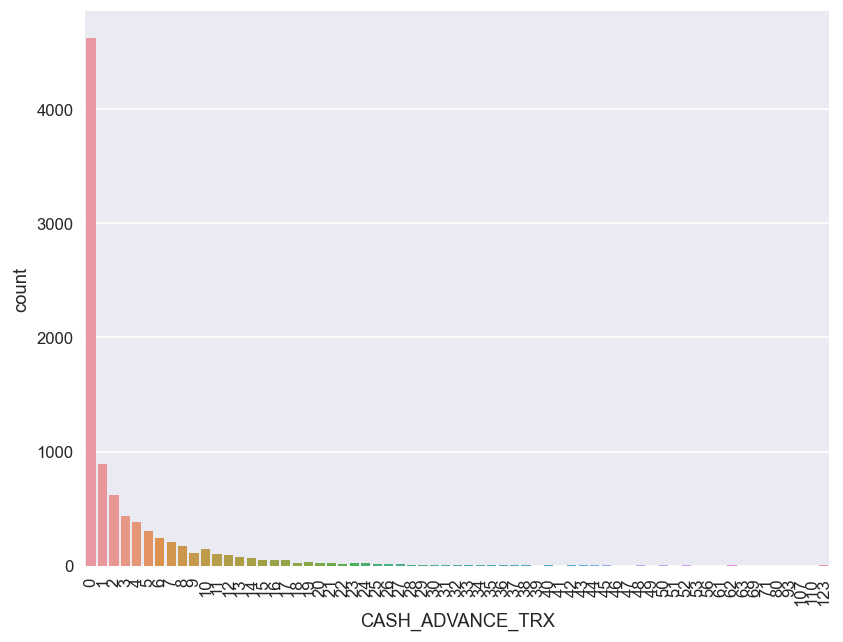

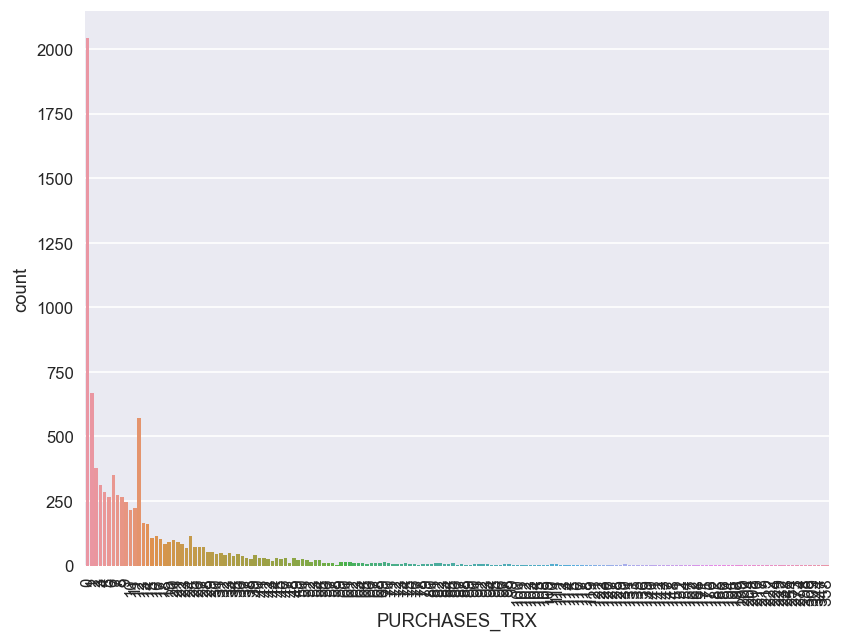

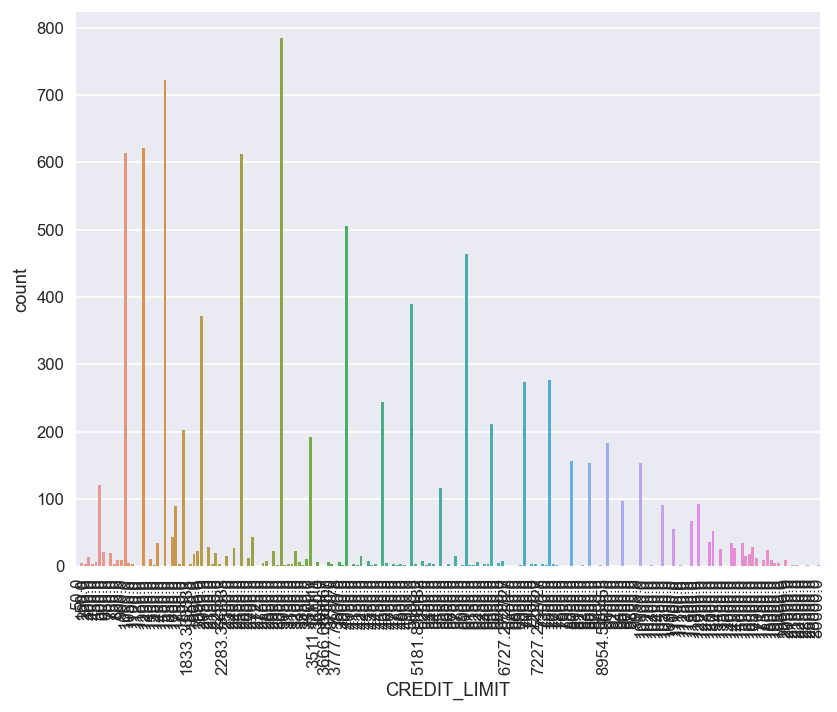

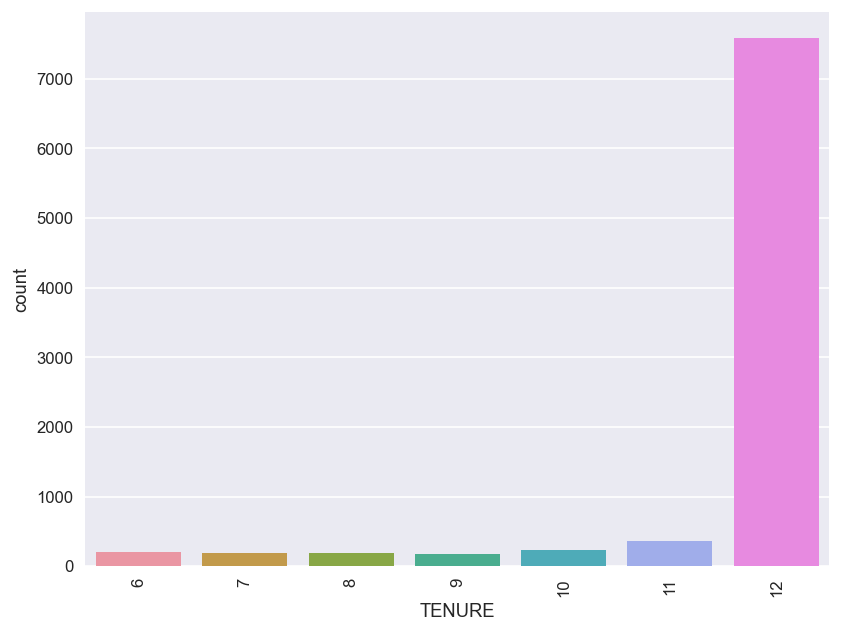

In [12]:
disc_features = ['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'TENURE']
for i in range(4):
    fig = plt.figure(figsize = (8, 6), dpi = 120)
    sns.countplot(x = disc_features[i], data = data)
    plt.xticks(rotation = 90)
    i += 1

Distribution of the values in the `CREDIT_LIMIT` column is almost gaussain.

### Handling Missing Values

In [13]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [14]:
mask = data['CREDIT_LIMIT'].isnull()
data[mask]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


Regarding the sample above, that has no value for `CREDIT_LIMIT`, as most of the other features are in high density range based on the boxplots, removing the data will not have any advrse effect on the modeling process. Also, the number of samples is relatively high and this result in the negligibility of a single sample.

In [15]:
data = data[mask == False]
data.reset_index(drop = True, inplace = True)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8945,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8946,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8947,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [16]:
mask = data['MINIMUM_PAYMENTS'].isnull()
data[mask].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,0.0,313.0,313.000000
mean,555.441321,0.389403,393.087284,250.433387,142.653898,559.136698,0.336043,0.107886,0.244670,0.067169,1.460064,5.833866,3731.789137,322.286168,NaN,0.0,11.063898
std,1292.687887,0.408341,757.905701,624.453991,311.289043,1185.132567,0.372517,0.227370,0.359756,0.130087,3.182359,9.600908,2924.606153,1996.658905,NaN,0.0,1.869734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,NaN,0.0,6.000000
25%,0.187069,0.090909,1.400000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,0.000000,NaN,0.0,12.000000
50%,16.848358,0.181818,130.400000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,2.000000,3000.000000,0.000000,NaN,0.0,12.000000
75%,286.686616,1.000000,399.950000,176.030000,152.280000,480.104401,0.583333,0.083333,0.416667,0.083333,1.000000,8.000000,5000.000000,0.000000,NaN,0.0,12.000000
max,9164.724752,1.000000,7597.090000,6761.290000,2959.240000,7616.064965,1.000000,1.000000,1.000000,1.000000,21.000000,77.000000,19500.000000,29272.486070,NaN,0.0,12.000000


Inspecting the table above, it is notable that all the values in `PRC_FULL_PAYMENT` column are equal to zero.

In [17]:
mask_1 = data['MINIMUM_PAYMENTS'].notnull()
mask_2 = data['PRC_FULL_PAYMENT'] == 0
len(data[mask_1][mask_2])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4504\500552183.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(data[mask_1][mask_2])


5589

In [18]:
mask = data['MINIMUM_PAYMENTS'].notnull()
data[mask]['MINIMUM_PAYMENTS'].agg(['min', 'max', 'mean', 'median', 'std', 'var'])

min       1.916300e-02
max       7.640621e+04
mean      8.643049e+02
median    3.124523e+02
std       2.372566e+03
var       5.629071e+06
Name: MINIMUM_PAYMENTS, dtype: float64

Comparing std with mean, values of the feature `MINIMUM_PAYMENTS` are varied, and they cannot be imputed using univariate imputation techniques.

In [19]:
data.corr().loc['MINIMUM_PAYMENTS'].sort_values(ascending = False)

MINIMUM_PAYMENTS                    1.000000
BALANCE                             0.398669
CASH_ADVANCE                        0.140094
BALANCE_FREQUENCY                   0.132519
INSTALLMENTS_PURCHASES              0.132156
CREDIT_LIMIT                        0.126671
PAYMENTS                            0.126630
CASH_ADVANCE_TRX                    0.109727
CASH_ADVANCE_FREQUENCY              0.098844
PURCHASES_TRX                       0.096311
PURCHASES                           0.093842
TENURE                              0.059330
ONEOFF_PURCHASES                    0.048741
PURCHASES_INSTALLMENTS_FREQUENCY    0.030036
PURCHASES_FREQUENCY                 0.002979
ONEOFF_PURCHASES_FREQUENCY         -0.030357
PRC_FULL_PAYMENT                   -0.140404
Name: MINIMUM_PAYMENTS, dtype: float64

In [20]:
# -1 to 1
# negative
# positive:- 0.5= 0.60

Regarding the correlation coefficients of features with `MINIMUM_PAYMENTS`, it is not highly correlated with any of the features and simple imputation techniques like `KNN` and `Regression` cannot yield satisfying results.

- Concluding from the analysis on this feature, rows with missing values are being removed form the dataset.

In [21]:
data.dropna(inplace = True)
data.reset_index(drop = True, inplace = True)
data

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4504\885090313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Handling Noises

As we now that there are considerable number of outliers in the dataset, a cell is being run several times to check for the outliers and potential noises.

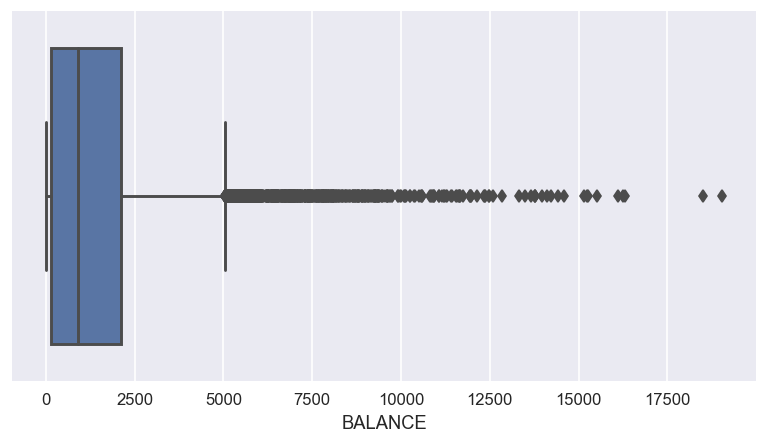

In [22]:
i = 0  #Change the value of i to check the box plot of each feature. max = 16
plt.figure(figsize = (8, 4), dpi = 120)

sns.boxplot(x = data.columns[i], data = data)
plt.show()

Outliers of each feature :
- `BALANCE` > 17500 
- `BALANCE_FREQUENCY` == 0 
- `PURCHASES` > 30000 
- `ONEOFF_PURCHASES` > 30000 
- `INSTALLMENTS_PURCHASES` > 20000 
- `CASH_ADVANCE` > 40000 
- `CASH_ADVANCE_FREQUENCY` > 1.4 
- `CASH_ADVANCE_TRX` > 80 
- `CREDIT_LIMIT` >= 25000 
- `PAYMENTS` > 45000 
- `MINIMUM_PAYMENTS` > 35000

In [23]:
data['BALANCE'].nlargest(5)

122     19043.13856
3992    18495.55855
5309    16304.88925
6410    16259.44857
5107    16115.59640
Name: BALANCE, dtype: float64

<Axes: >

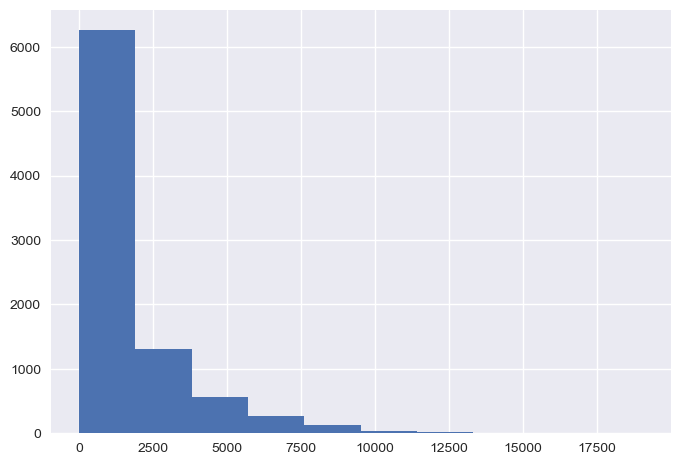

In [24]:
data['BALANCE'].hist(bins = 10)

In [25]:
mask = data['BALANCE'] <= 17500
data[mask]['BALANCE'].describe()    #without outliers  

count     8634.000000
mean      1597.248028
std       2079.451860
min          0.000000
25%        147.923961
50%        916.693628
75%       2100.631605
max      16304.889250
Name: BALANCE, dtype: float64

In [26]:
data['BALANCE'].describe()  #with outliers

count     8636.000000
mean      1601.224893
std       2095.571300
min          0.000000
25%        148.095189
50%        916.855459
75%       2105.195853
max      19043.138560
Name: BALANCE, dtype: float64

* `BALANCE`: Comparing the potential noises with the statistics, and the difference in statistics of the feature without the outliers, concludes that they are not noises but only outliers.

In [27]:
mask = data['BALANCE_FREQUENCY'] < 0.1
sum(mask)

31

In [28]:
data['BALANCE_FREQUENCY'].nsmallest(10)

1480    0.000000
4779    0.000000
6824    0.000000
7201    0.000000
7429    0.000000
7584    0.000000
181     0.090909
695     0.090909
723     0.090909
1014    0.090909
Name: BALANCE_FREQUENCY, dtype: float64

<Axes: >

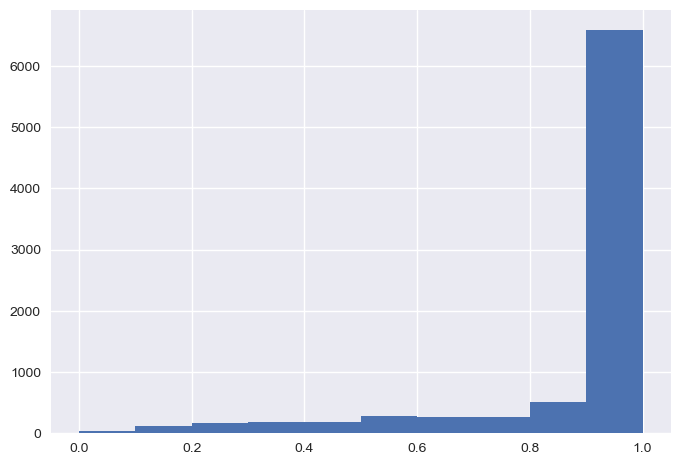

In [29]:
data['BALANCE_FREQUENCY'].hist(bins = 10)

In [30]:
mask = data['BALANCE_FREQUENCY'] == 0
data[mask == False]['BALANCE_FREQUENCY'].describe()

count    8630.000000
mean        0.895657
std         0.206423
min         0.090909
25%         0.909091
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64

In [31]:
data['BALANCE_FREQUENCY'].describe()

count    8636.000000
mean        0.895035
std         0.207697
min         0.000000
25%         0.909091
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64

- `BALANCE_FREQUENCY`: The values in this column that are equal to zero are not noises, and also they are not far enough to be considered as outliers.



In [32]:
data['PURCHASES'].nlargest(5)

512     49039.57
464     41050.40
1166    40040.71
1509    38902.71
3792    35131.16
Name: PURCHASES, dtype: float64

<Axes: >

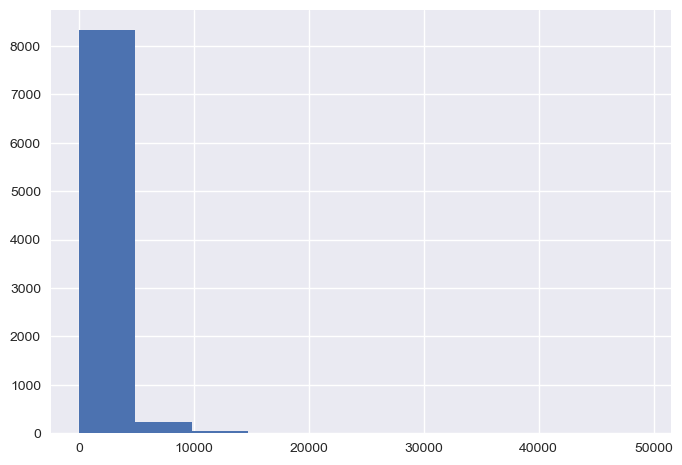

In [33]:
data['PURCHASES'].hist(bins = 10)

In [34]:
data['PURCHASES'].describe()

count     8636.000000
mean      1025.433874
std       2167.107984
min          0.000000
25%         43.367500
50%        375.405000
75%       1145.980000
max      49039.570000
Name: PURCHASES, dtype: float64

In [35]:
mask = data['PURCHASES'] > 30000
data[mask == False]['PURCHASES'].describe()

count     8629.000000
mean       995.207238
std       1883.487877
min          0.000000
25%         43.250000
50%        374.950000
75%       1141.240000
max      27957.680000
Name: PURCHASES, dtype: float64

In [36]:
data['PURCHASES'] > 30000

0       False
1       False
2       False
3       False
4       False
        ...  
8631    False
8632    False
8633    False
8634    False
8635    False
Name: PURCHASES, Length: 8636, dtype: bool

- `PURCHASES`: There is a suspicious information about one of the samples above, and that is the both `PURCHASES` and `PAYMENTS` are in the range of outliers! `(index = 512)`. Also, potential outliers have a considerable effect on the statistics specially mean value of this column. `(index = 246, 464, 512, 1166, 1509, 1545, 3792)`

In [37]:
data['ONEOFF_PURCHASES'].nlargest(8)

512     40761.25
464     40624.06
3792    34087.73
1509    33803.84
246     26547.43
6818    26514.32
1355    25122.77
1166    24543.52
Name: ONEOFF_PURCHASES, dtype: float64

<Axes: >

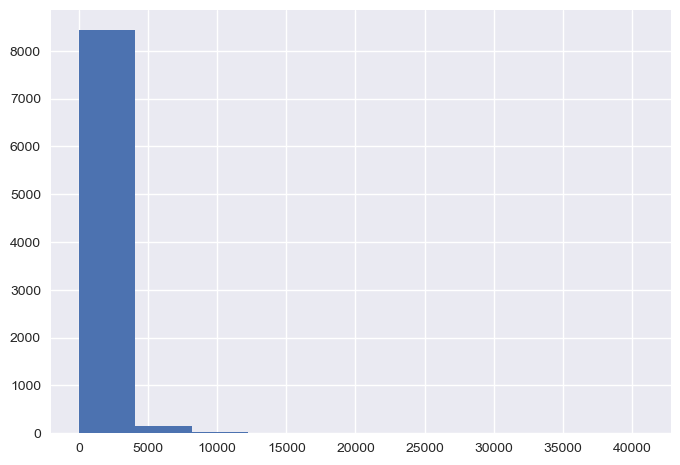

In [38]:
data['ONEOFF_PURCHASES'].hist(bins = 10)

In [39]:
mask = data['ONEOFF_PURCHASES'] > 30000
data[mask]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
464,13479.288210,1.0,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.75068,15914.484620,0.083333,12
512,11547.520010,1.0,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.250000,12
1509,3391.702180,1.0,38902.71,33803.84,5098.87,0.000000,1.000000,1.000000,1.000000,0.000000,0,195,18000.0,35843.62593,716.027656,1.000000,12
3792,2997.977825,1.0,35131.16,34087.73,1043.43,0.000000,1.000000,1.000000,0.833333,0.000000,0,344,12000.0,28896.66522,767.014180,0.750000,12


In [40]:
data['ONEOFF_PURCHASES'].describe()

count     8636.000000
mean       604.901438
std       1684.307803
min          0.000000
25%          0.000000
50%         44.995000
75%        599.100000
max      40761.250000
Name: ONEOFF_PURCHASES, dtype: float64

In [41]:
data[mask == False]['ONEOFF_PURCHASES'].describe()

count     8632.000000
mean       587.888316
std       1485.914085
min          0.000000
25%          0.000000
50%         44.850000
75%        598.037500
max      26547.430000
Name: ONEOFF_PURCHASES, dtype: float64

- `ONEOFF_PURCHASES` : Checking the samples of this filter with filters from previous feature, it is notable that all of the outliers of `ONEOFF_PURCHASES` are also outliers of the `PURCHASES` column! `(index = 464, 512, 1509, 3792)`

In [42]:
data['INSTALLMENTS_PURCHASES'].nlargest(5)

5086    22500.00
1166    15497.19
3059    14686.10
3564    13184.43
2707    12738.47
Name: INSTALLMENTS_PURCHASES, dtype: float64

<Axes: >

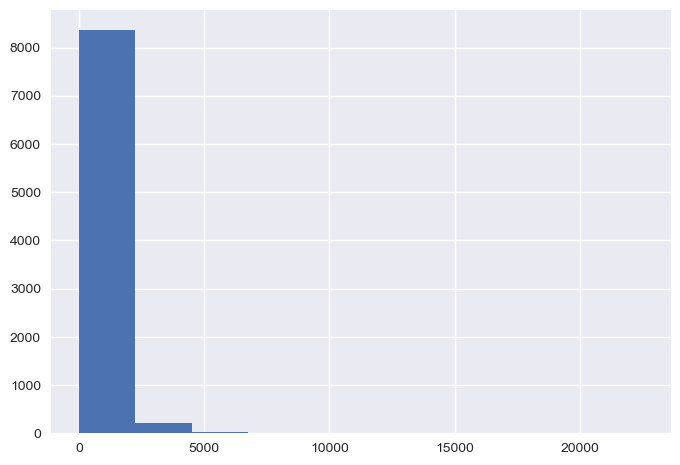

In [43]:
data['INSTALLMENTS_PURCHASES'].hist(bins = 10)

In [44]:
data['INSTALLMENTS_PURCHASES'].describe()

count     8636.000000
mean       420.843533
std        917.245182
min          0.000000
25%          0.000000
50%         94.785000
75%        484.147500
max      22500.000000
Name: INSTALLMENTS_PURCHASES, dtype: float64

In [45]:
mask = data['INSTALLMENTS_PURCHASES'] < 20000
data[mask]['INSTALLMENTS_PURCHASES'].describe()

count     8635.000000
mean       418.286595
std        885.984236
min          0.000000
25%          0.000000
50%         94.710000
75%        483.680000
max      15497.190000
Name: INSTALLMENTS_PURCHASES, dtype: float64

In [46]:
data.sort_values(by = 'INSTALLMENTS_PURCHASES', ascending = False).head(1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5086,4060.710208,0.727273,22500.0,0.0,22500.0,0.0,0.5,0.0,0.416667,0.0,0,12,23000.0,8760.860264,1645.535202,0.0,12


- `INSTALLMENTS_PURCHASES`: The only notable thing about the outlier is that by removing it, statistics of this column changes considerably as the distance between this sample and the nearest samples is quite significant. `(index = 5086)`

In [47]:
data['CASH_ADVANCE'].nlargest(5)

2054    47137.21176
977     29282.10915
64      27296.48576
7022    26268.69989
7402    26194.04954
Name: CASH_ADVANCE, dtype: float64

<Axes: >

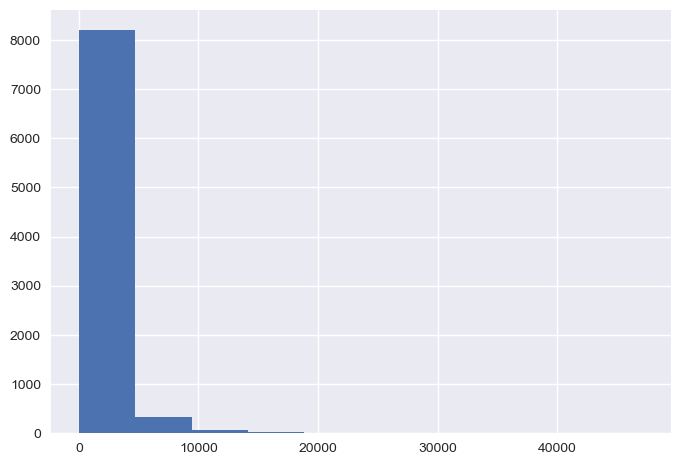

In [48]:
data['CASH_ADVANCE'].hist(bins = 10)

In [49]:
data['CASH_ADVANCE'].describe()

count     8636.000000
mean       994.175523
std       2121.458303
min          0.000000
25%          0.000000
50%          0.000000
75%       1132.385490
max      47137.211760
Name: CASH_ADVANCE, dtype: float64

In [50]:
mask = data['CASH_ADVANCE'] < 45000
data[mask]['CASH_ADVANCE'].describe()

count     8635.000000
mean       988.831801
std       2062.637616
min          0.000000
25%          0.000000
50%          0.000000
75%       1131.895249
max      29282.109150
Name: CASH_ADVANCE, dtype: float64

In [51]:
data['CASH_ADVANCE'] > 45000


#ans= false 

0       False
1       False
2       False
3       False
4       False
        ...  
8631    False
8632    False
8633    False
8634    False
8635    False
Name: CASH_ADVANCE, Length: 8636, dtype: bool

In [52]:
data.iloc[2054]

BALANCE                             10905.053810
BALANCE_FREQUENCY                       1.000000
PURCHASES                             431.930000
ONEOFF_PURCHASES                      133.500000
INSTALLMENTS_PURCHASES                298.430000
CASH_ADVANCE                        47137.211760
PURCHASES_FREQUENCY                     0.583333
ONEOFF_PURCHASES_FREQUENCY              0.250000
PURCHASES_INSTALLMENTS_FREQUENCY        0.500000
CASH_ADVANCE_FREQUENCY                  1.000000
CASH_ADVANCE_TRX                      123.000000
PURCHASES_TRX                          21.000000
CREDIT_LIMIT                        19600.000000
PAYMENTS                            39048.597620
MINIMUM_PAYMENTS                     5394.173671
PRC_FULL_PAYMENT                        0.000000
TENURE                                 12.000000
Name: 2054, dtype: float64

- `CASH_ADVANCE`: The only outlier in this column is far away from other samples, and it has a significant effect on the statistics. `(index = 2054)`

In [53]:
data['CASH_ADVANCE_FREQUENCY'].nlargest(5)

2919    1.500000
640     1.250000
1530    1.166667
3129    1.166667
8086    1.142857
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

<Axes: >

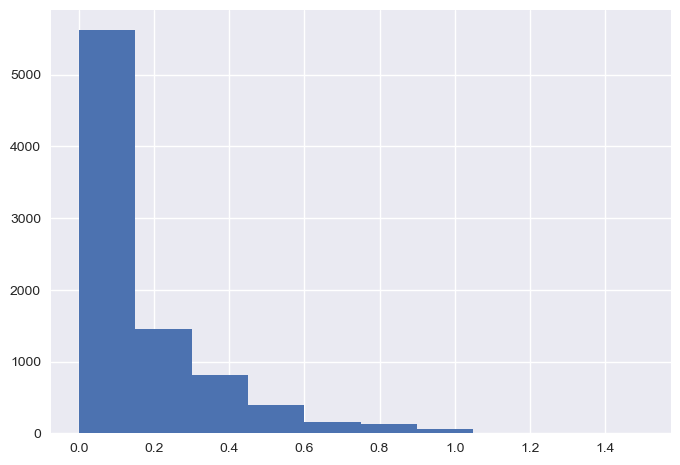

In [54]:
data['CASH_ADVANCE_FREQUENCY'].hist(bins = 10)

In [55]:
data['CASH_ADVANCE_FREQUENCY'].describe()

count    8636.000000
mean        0.137604
std         0.201791
min         0.000000
25%         0.000000
50%         0.000000
75%         0.250000
max         1.500000
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

- `CASH_ADVANCE_FREQUENCY`: As the potential outlier in this column is not much distant from the rest of the values, and the range of values is small, it dios not have any major effect on the statistics, and in real word, this value is possible.

In [56]:
data['CASH_ADVANCE_TRX'].nlargest(10)

504     123
2054    123
8039    123
3417    110
1812    107
5113     93
5145     80
4951     71
7402     69
3137     63
Name: CASH_ADVANCE_TRX, dtype: int64

In [57]:
data.iloc[[504, 2054, 8039, 3417, 1812, 5113]]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
504,1284.633140,1.000000,55.50,0.00,55.50,5406.459348,0.083333,0.000000,0.083333,0.833333,123,1,3000.0,3432.757202,421.385587,0.000000,12
2054,10905.053810,1.000000,431.93,133.50,298.43,47137.211760,0.583333,0.250000,0.500000,1.000000,123,21,19600.0,39048.597620,5394.173671,0.000000,12
8039,2648.244646,1.000000,0.00,0.00,0.00,10458.978150,0.000000,0.000000,0.000000,1.000000,123,0,4000.0,9818.531412,665.888853,0.000000,12
3417,4175.826879,1.000000,0.00,0.00,0.00,9968.184827,0.000000,0.000000,0.000000,0.909091,110,0,10500.0,1083.433387,1000.206323,0.000000,11
1812,1856.325339,0.818182,670.50,516.90,153.60,5603.126858,0.545455,0.272727,0.363636,0.727273,107,9,7000.0,9221.922948,537.180986,0.142857,11
5113,7268.706380,1.000000,306.91,306.91,0.00,12702.427700,0.272727,0.272727,0.000000,1.000000,93,4,12000.0,3512.633784,2096.962594,0.000000,11


<Axes: >

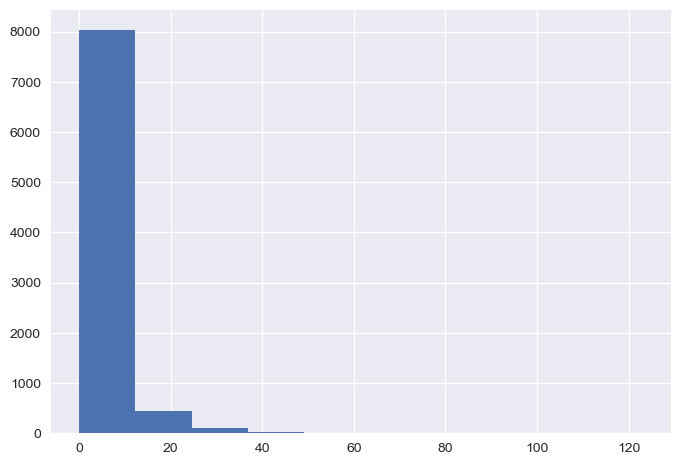

In [58]:
data['CASH_ADVANCE_TRX'].hist(bins = 10)

In [59]:
data['CASH_ADVANCE_TRX'].describe()

count    8636.000000
mean        3.313918
std         6.912506
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       123.000000
Name: CASH_ADVANCE_TRX, dtype: float64

In [60]:
mask = data['CASH_ADVANCE_TRX'] <= 80
data[mask]['CASH_ADVANCE_TRX'].describe()

count    8630.000000
mean        3.237543
std         6.271590
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max        80.000000
Name: CASH_ADVANCE_TRX, dtype: float64

In [61]:
mask=data['CASH_ADVANCE_TRX']>80
data[mask]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
504,1284.633140,1.000000,55.50,0.00,55.50,5406.459348,0.083333,0.000000,0.083333,0.833333,123,1,3000.0,3432.757202,421.385587,0.000000,12
1812,1856.325339,0.818182,670.50,516.90,153.60,5603.126858,0.545455,0.272727,0.363636,0.727273,107,9,7000.0,9221.922948,537.180986,0.142857,11
2054,10905.053810,1.000000,431.93,133.50,298.43,47137.211760,0.583333,0.250000,0.500000,1.000000,123,21,19600.0,39048.597620,5394.173671,0.000000,12
3417,4175.826879,1.000000,0.00,0.00,0.00,9968.184827,0.000000,0.000000,0.000000,0.909091,110,0,10500.0,1083.433387,1000.206323,0.000000,11
5113,7268.706380,1.000000,306.91,306.91,0.00,12702.427700,0.272727,0.272727,0.000000,1.000000,93,4,12000.0,3512.633784,2096.962594,0.000000,11
8039,2648.244646,1.000000,0.00,0.00,0.00,10458.978150,0.000000,0.000000,0.000000,1.000000,123,0,4000.0,9818.531412,665.888853,0.000000,12


- `CASH_ADVANCE_TRX`: The outliers in this column did not alter the mean value much, but their effect on the standard deviation is significant. `(index = 504, 2054, 8039, 3417, 1812, 5113)`

In [62]:
data['CREDIT_LIMIT'].nlargest(10)

4747    30000.0
6818    30000.0
900     28000.0
3527    25000.0
176     23000.0
5086    23000.0
512     22500.0
3992    22000.0
126     21500.0
1422    21500.0
Name: CREDIT_LIMIT, dtype: float64

- `CREDIT_LIMIT` : Although the boxplot shows some outliers, but the distance between the potential outliers and the rest of the samples is not far.

In [63]:
data['PAYMENTS'].nlargest(5)

4072    50721.48336
512     46930.59824
4514    40627.59524
5183    39461.96580
2054    39048.59762
Name: PAYMENTS, dtype: float64

In [64]:
data.iloc[[512, 4072]]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
512,11547.520010,1.000000,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12
4072,1268.809031,0.272727,17945.00,17945.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,18000.0,50721.48336,1149.747342,0.00,12


<Axes: >

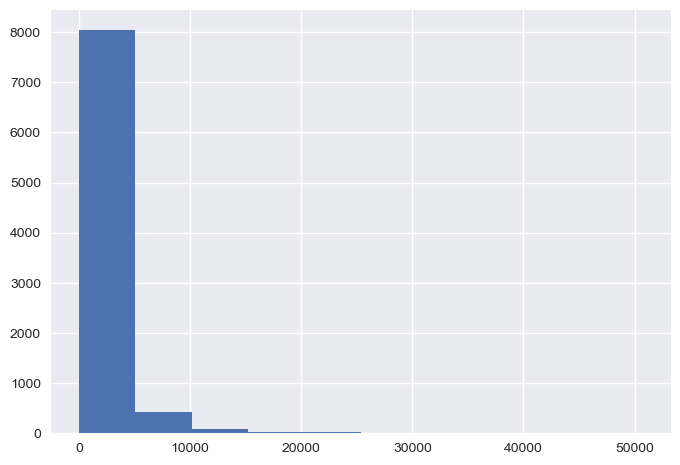

In [65]:
data['PAYMENTS'].hist(bins = 10)

In [66]:
data['PAYMENTS'].describe()

count     8636.000000
mean      1784.478099
std       2909.810090
min          0.049513
25%        418.559237
50%        896.675701
75%       1951.142090
max      50721.483360
Name: PAYMENTS, dtype: float64

In [67]:
mask = data['PAYMENTS'] < 45000
data[mask]['PAYMENTS'].describe()

count     8634.000000
mean      1773.581281
std       2820.521674
min          0.049513
25%        418.484380
50%        895.707030
75%       1947.827567
max      40627.595240
Name: PAYMENTS, dtype: float64

In [68]:
mask=data['PAYMENTS']>45000
data[mask]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
512,11547.520010,1.000000,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12
4072,1268.809031,0.272727,17945.00,17945.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,18000.0,50721.48336,1149.747342,0.00,12


- `PAYMENTS`: The effect of the outliers on the mean and std of the column is not negligible. Also, as the secong largest value of this column is volunteer to be excluded from the data, as the value for `PURCHASES` of this sample is also an outlier, the largest one needs to be removed as well, Otherwise, the distance between the largest value and the next one would be so much. `(index = 512, 4072)`

In [69]:
data['MINIMUM_PAYMENTS'].nlargest(10)

4226    76406.20752
6902    61031.61860
5474    56370.04117
4311    50260.75947
5640    43132.72823
5775    42629.55117
529     38512.12477
5124    31871.36379
1045    30528.43240
6416    29019.80288
Name: MINIMUM_PAYMENTS, dtype: float64

<Axes: >

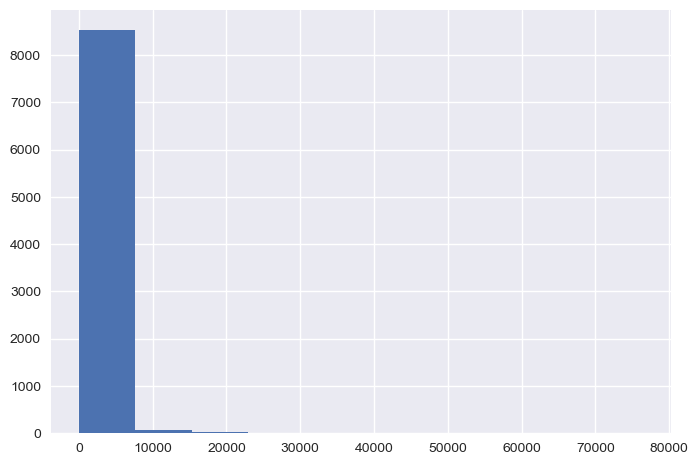

In [70]:
data['MINIMUM_PAYMENTS'].hist(bins = 10)

In [71]:
data['MINIMUM_PAYMENTS'].describe()

count     8636.000000
mean       864.304943
std       2372.566350
min          0.019163
25%        169.163545
50%        312.452292
75%        825.496463
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [72]:
mask = data['MINIMUM_PAYMENTS'] > 35000
data[mask == False]['MINIMUM_PAYMENTS'].describe()

count     8629.000000
mean       822.319441
std       1826.881731
min          0.019163
25%        169.079690
50%        311.963409
75%        819.267218
max      31871.363790
Name: MINIMUM_PAYMENTS, dtype: float64

In [73]:
data[mask]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
529,3457.086184,1.0,2448.60,0.0,2448.60,0.000000,1.0,0.0,1.0,0.000000,0,12,1700.0,227.514473,38512.12477,0.0,12
4226,10571.411070,1.0,7739.48,0.0,7739.48,0.000000,1.0,0.0,1.0,0.000000,0,44,8000.0,2688.447014,76406.20752,0.0,12
4311,4976.028578,1.0,900.87,0.0,900.87,0.000000,1.0,0.0,1.0,0.000000,0,162,5500.0,92.865469,50260.75947,0.0,12
5474,4628.109931,1.0,912.54,0.0,912.54,0.000000,1.0,0.0,1.0,0.000000,0,21,5000.0,3746.305759,56370.04117,0.0,12
5640,8038.893195,1.0,0.00,0.0,0.00,197.915586,0.0,0.0,0.0,0.166667,8,0,9000.0,3569.182969,43132.72823,0.0,12
5775,6022.224462,1.0,0.00,0.0,0.00,4111.465632,0.0,0.0,0.0,0.166667,6,0,7000.0,4560.775720,42629.55117,0.0,12
6902,9024.812044,1.0,0.00,0.0,0.00,2750.442399,0.0,0.0,0.0,0.083333,2,0,9000.0,302.484224,61031.61860,0.0,12


- As some of the samples above, with regard to some features like `balance`, are in the range with lower density of data, removing all of them may have an adverse effect on the model.

In [74]:
mask = data['MINIMUM_PAYMENTS'] > 50000
data[mask == False]['MINIMUM_PAYMENTS'].describe()

count     8632.000000
mean       836.430591
std       1977.534021
min          0.019163
25%        169.112703
50%        312.096808
75%        821.776198
max      43132.728230
Name: MINIMUM_PAYMENTS, dtype: float64

- `MINIMUM_PAYMENTS`: Excluding the outliers in this column, lower the mean value and std but not considerably. However, due the distance of the sample with its neighbors, removing them may be the better approach. `(index = 4226, 6902, 5474, 4311)`

- Now that we have the potential `noises`, in the `modeling` section they will be excluded from the data and wil be kept in a seperate dataframe. Reason behind this is that in case of using density based clustering method, which are robust to outliers, they do not need to be excluded and can be go through modeling process just like other samples. As a result, these samples will just be excluded for some of the algorithms and not all of them.

- `Indices : 246, 464, 512, 1166, 1509, 1545, 3792, 3792, 5086, 2054, 504, 8039, 3417, 1812, 5113, 4072, 4226, 6902, 5474, 4311`

In [75]:
df_1 = data.drop([246, 464, 512, 1166, 1509, 1545, 3792, 5086, 2054, 504, 8039, 3417, 1812, 5113,
                  4072, 4226, 6902, 5474, 4311])
df_1.reset_index(drop = True, inplace = True)
df_1



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8612,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8613,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8614,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8615,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### In-Depth Visual Analysis

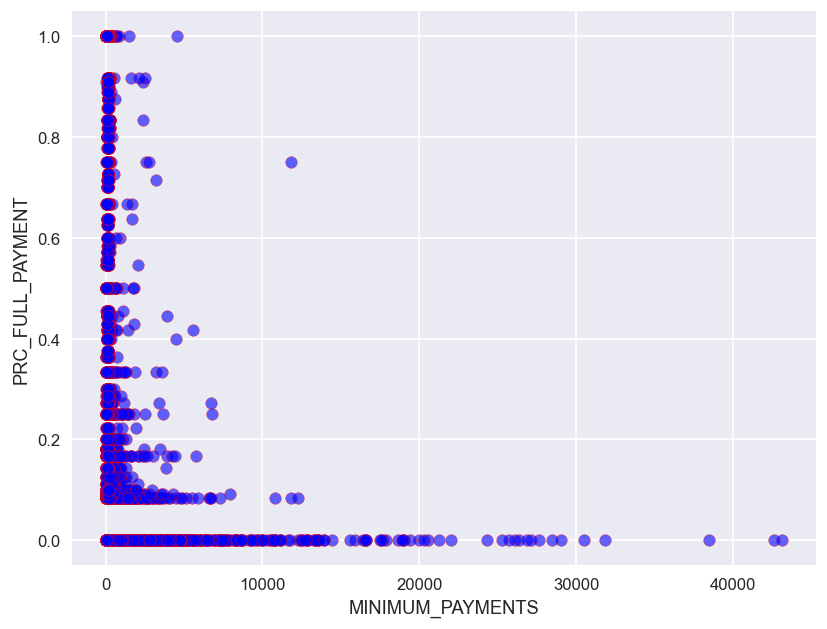

In [76]:
# In order to check for remaining outliers, df_1 is being used instead of the original data.
try:
    #x = int(input('feature No: '))
    #y = int(input('feature No: '))
    x, y = 14, 15
    feature_1, feature_2 = data.columns[x], data.columns[y]
    plt.figure(figsize = (8, 6), dpi = 120)
    plt.scatter(df_1[feature_1], df_1[feature_2], color = 'blue', edgecolors = 'red', alpha = 0.6)
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
except:
    print('Invalid Number!')

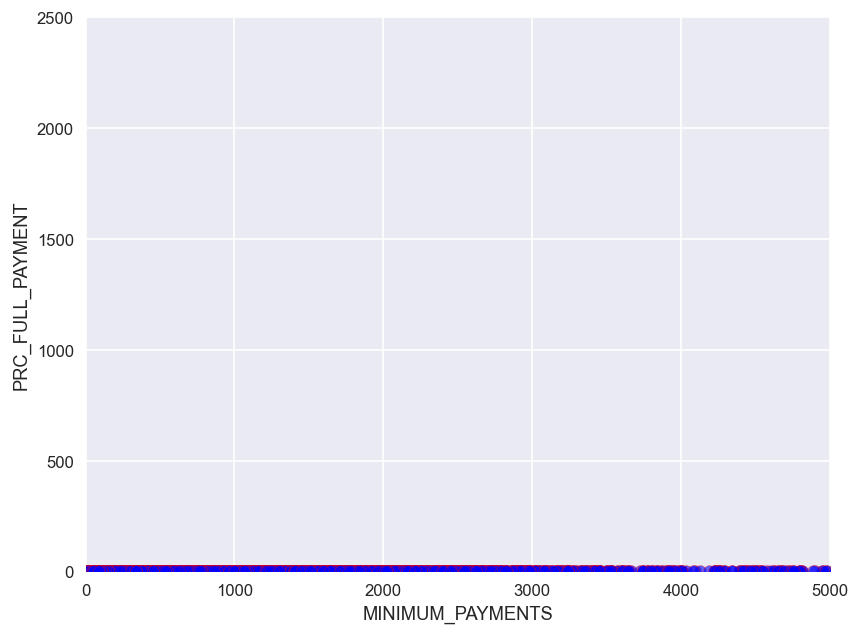

In [77]:
# This cell is being used for limiting the range of x and y in the scatter plot aiming to zoom in and
# get better insight about the data.
plt.figure(figsize = (8, 6), dpi = 120)
plt.scatter(df_1[feature_1], df_1[feature_2], color = 'blue', edgecolors = 'red', alpha = 0.6)
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.xlim(0, 5000)
plt.ylim(0, 2500)
plt.show()

Analyzing scatter plots has shown that the data still cotains some outliers in 2D space.

- `Remining outliers` :

- Largest value of BALANCE

- `BALANCE` > 10000, `PURCHASES_TRX` > 250
- `PURCHASES` > 20000, `CASH_ADVANCE` > 18000
- `PURCHASES` > 20000, `CASH_ADVANCE_TRX` > 30
- `PURCHASES` > 25000, `CREDIT_LIMIT` > 25000
- `PURCHASES` > 20000, `PAYMENTS` > 35000
- `ONEOFF_PURCHASES` > 20000, `CASH_ADVANCE_FREQUENCY` > 0.6
- `ONEOFF_PURCHASES` > 25000, `CREDIT_LIMIT` > 25000
- `INSTALLMENTS_PURCHASES` > 8000, `CASH_ADVANCE` > 14500
- `INSTALLMENTS_PURCHASES` > 12000, `PURCHASES_FREQUENCY` < 0.4
- `INSTALLMENTS_PURCHASES` > 12000, `PURCHASES_INSTALLMENTS_FREQUENCY` < 0.2
- `CASH_ADVANCE` > 25000, 0.6 < `PURCHASES_FREQUENCY` < 0.8
- `CASH_ADVANCE` > 14000, `PURCHASES_TRX` > 300
- `PURCHASES_FREQUENCY` < 0.4, `PURCHASES_TRX` > 150
- `PURCHASES_FREQUENCY` < 0.8, `PURCHASES_TRX` > 300
- largest value of `CASH_ADVANCE_FREQUENCY`
- `CASH_ADVANCE_TRX` > 40, `PURCHASES_TRX` > 300
- Indices of the `outliers` : `122, 2698, 3050, 5167, 896, 6801, 4350, 1605, 64, 7467, 4614, 2910`

In [78]:
df_2 = df_1.drop([122, 2698, 3050, 5167, 896, 6801, 4350, 1605, 64, 7467, 4614, 2910])
df_2.reset_index(drop = True, inplace = True)
df_2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8600,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8601,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8602,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8603,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


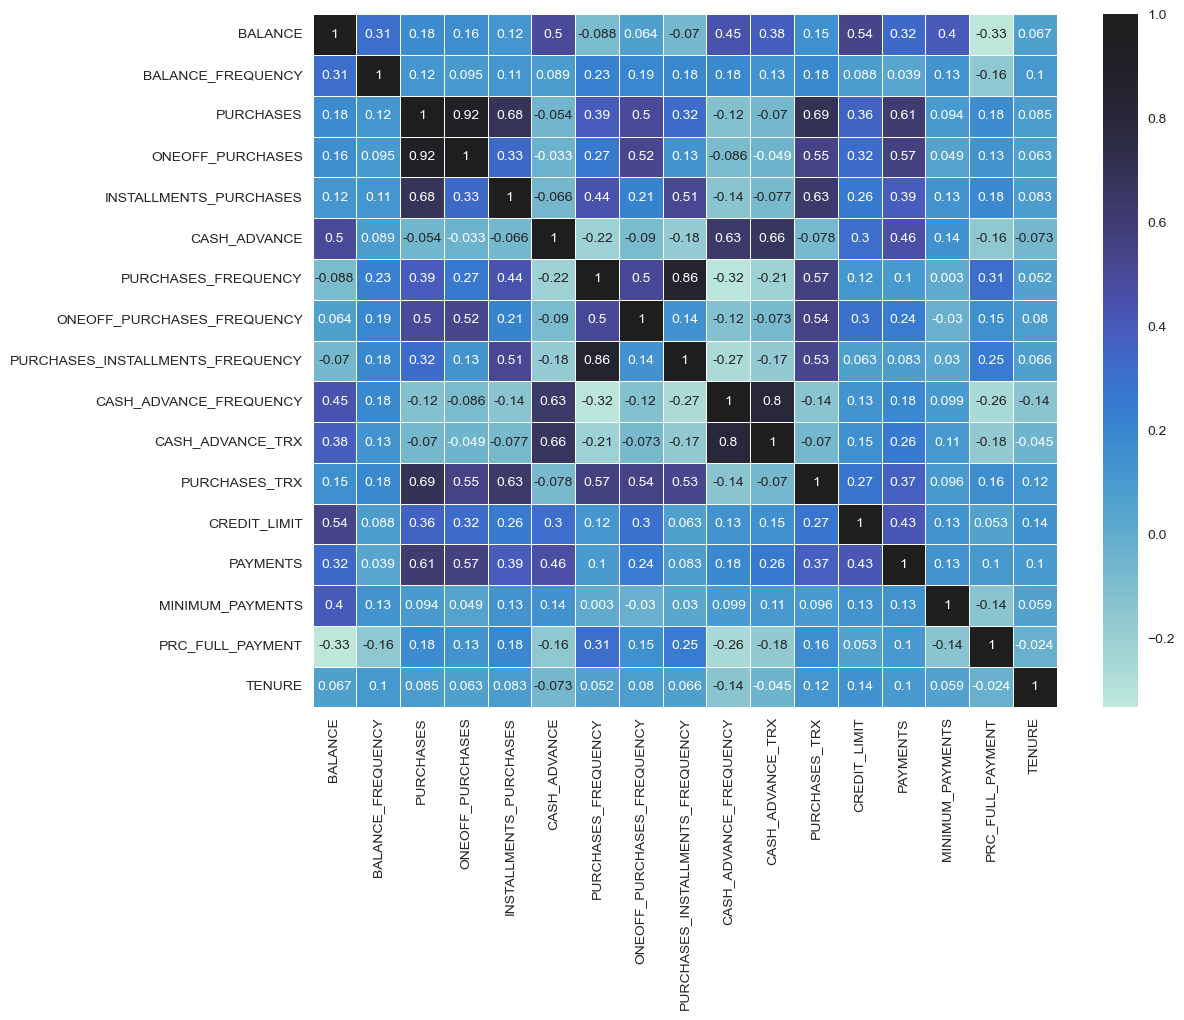

In [79]:
fig, ax = plt.subplots(figsize = (12, 9), dpi = 100)
sns.heatmap(data.corr(), center = 1, cbar = True, annot = True, linewidths = 0.5, ax = ax)
plt.show()

In [80]:
# DF, DF1=OUTLIERS,DF2, DF3=2 COLUMNS


- Analysing the `correlation` between features, there are some pair of features with high correlation that might not be a good thing for modeling. These pairs are, `ONEOFF_PURCHASES` and `PURCHASES`, `PURCHASES_INSTALLMENTS_FREQUENCY` and `PURCHASES_FREQUENCY`, `CASH_ADVANCE_TRX` and `CASH_ADVANCE_FREQUENCY`.

- Inspecting all the plots above, a good feature to be used as the key feature for plotting and comparison purporses, is `BALANCE`. Reasons for this choice is that this feature is not discrete. Also, based on the kdeplot, values of this feature are more varied in comparison with other continuous features. In addition, this column is correlated with others to a good extent.

---

## Modeling

#### K-Means Algorithm

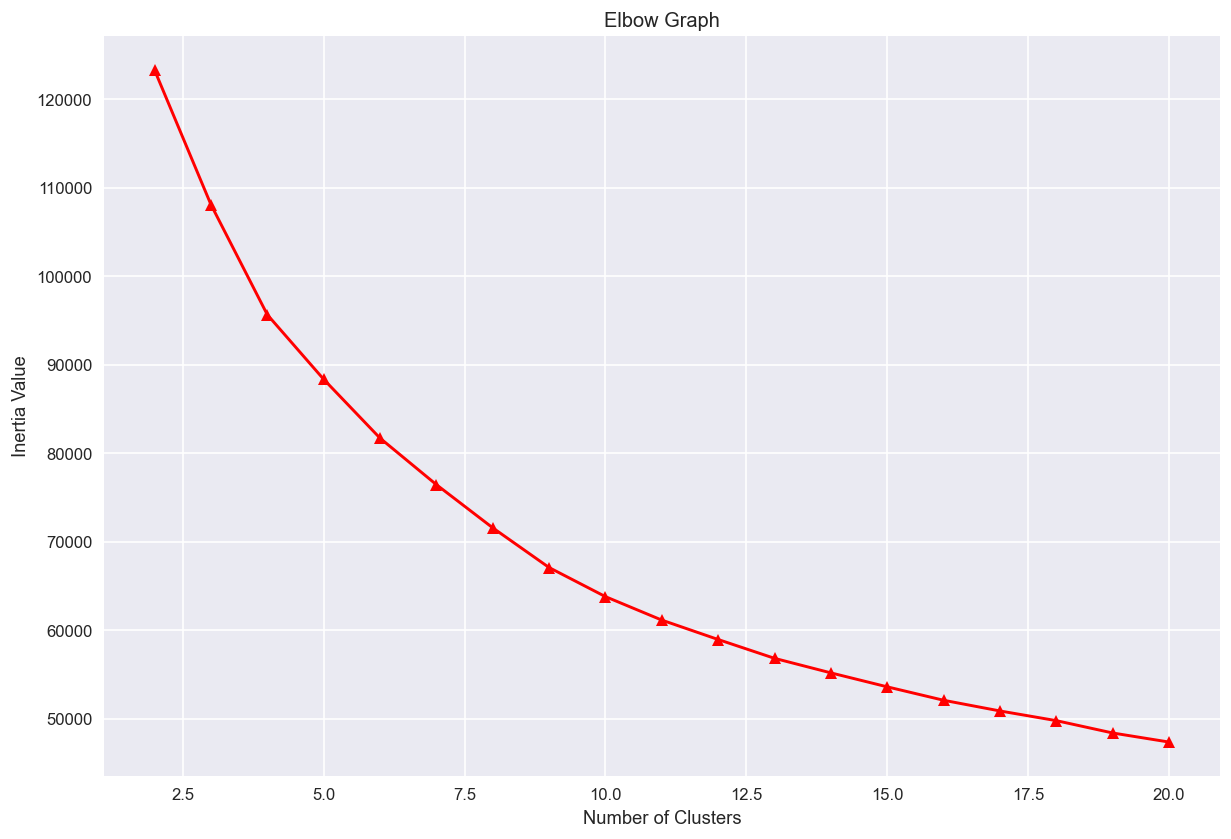

In [83]:
kmeans_constants = {'n_init' : 100, 'random_state' : 1}  #PERFORMANCE
inertia_values = []   
# 2-20
for k in range(2, 21):
    scaler = StandardScaler()
    X = scaler.fit_transform(data_cleaned)
    model = KMeans(n_clusters = k, **kmeans_constants)
    model.fit(X)
    inertia_values.append(model.inertia_)

plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), inertia_values, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Elbow Graph')
plt.show()

#performance of model=>inertia


In [ ]:
# with the help of elbow methods

In [82]:
data_cleaned=data.dropna()
data_cleaned

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [85]:
kl = KneeLocator(range(2, 21), inertia_values, curve = 'convex', direction = 'decreasing')
kl.elbow

9

In [86]:
pip install kneed

Elbow graph shows that `9 clusters` is the best choice for this dataset.

In [ ]:
silhoutte_coefs = []

for k in range(2, 21):
    scaler = StandardScaler()
    X = scaler.fit_transform(data)
    model = KMeans(n_clusters = k, **kmeans_constants)
    model.fit(X)
    silhoutte_coefs.append(metrics.silhouette_score(X, model.labels_))

plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), silhoutte_coefs, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score - Number of Clusters')
plt.show()

Based on the `silhouette` scores, `3 clusters` is the best choice. Considering that silhouette score is a better indicator than elbow graph, we will continue with `3 clusters`.

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(data)
model = KMeans(n_clusters = 3, **kmeans_constants)
model.fit(X)

In [ ]:
centroids = scaler.inverse_transform(model.cluster_centers_)
centroids = pd.DataFrame(centroids, columns = data.columns)

In [ ]:
plt.style.use('default')
i = 1
while i < len(data.columns):
    try:
        fig = plt.figure(figsize = (8, 5), dpi = 120)
        plt.subplot(1,2,1)
        plt.scatter(centroids['BALANCE'], centroids[data.columns[i]], marker = '*', c = 'r')
        plt.scatter(data['BALANCE'], data[data.columns[i]],
                    c = model.labels_.astype(float), alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(data.columns[i])
        plt.grid()
        i += 1
        plt.subplot(1,2,2)
        plt.scatter(centroids['BALANCE'], centroids[data.columns[i]], marker = '*', c = 'r')
        plt.scatter(data['BALANCE'], data[data.columns[i]],
                    c = model.labels_.astype(float), alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(data.columns[i])
        plt.grid()
        i += 1
    except IndexError:
        break
plt.show()


In [ ]:
print('Inertia : ', model.inertia_)
print('Silhouette Score : ', metrics.silhouette_score(X, model.labels_))
print('CH Score : ', metrics.calinski_harabasz_score(X, model.labels_))
print('DB Score : ', metrics.davies_bouldin_score(X, model.labels_))

Results of `KMeans` is not satisfying yet. As outliers have an adverse effect on the performance of `KMeans`, for improving the result, `df_1` and `df_2` will be used instead of `data`.

In [ ]:
inertia_values = []

for k in range(2, 21):
    scaler = StandardScaler()
    X = scaler.fit_transform(df_1)
    model = KMeans(n_clusters = k, **kmeans_constants)
    model.fit(X)
    inertia_values.append(model.inertia_)
    
plt.style.use('seaborn')
plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), inertia_values, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Elbow Graph')
plt.show()

In [ ]:
kl = KneeLocator(range(2, 21), inertia_values, curve = 'convex', direction = 'decreasing')
kl.elbow

Elbow graph yields slightly different result.

In [ ]:
silhoutte_coefs = []

for k in range(2, 21):
    scaler = StandardScaler()
    X = scaler.fit_transform(df_1)
    model = KMeans(n_clusters = k, **kmeans_constants)
    model.fit(X)
    silhoutte_coefs.append(metrics.silhouette_score(X, model.labels_))
    
plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), silhoutte_coefs, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score - Number of CLusters')
plt.show()

`Silhouette` score plot did not change much. Again the best score achieved with `3 clusters`, and the scores improved but not significantly.

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df_1)
model = KMeans(n_clusters = 3, **kmeans_constants)
model.fit(X)

In [ ]:
centroids = pd.DataFrame(scaler.inverse_transform(model.cluster_centers_), columns = df_1.columns)

In [ ]:
plt.style.use('default')
i = 1
while i < len(data.columns):
    try:
        fig = plt.figure(figsize = (8, 5), dpi = 120)
        plt.subplot(1,2,1)
        plt.scatter(centroids['BALANCE'], centroids[data.columns[i]], marker = '*', c = 'r')
        plt.scatter(df_1['BALANCE'], df_1[data.columns[i]],
                    c = model.labels_.astype(float), alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(data.columns[i])
        plt.grid()
        i += 1
        plt.subplot(1,2,2)
        plt.scatter(centroids['BALANCE'], centroids[data.columns[i]], marker = '*', c = 'r')
        plt.scatter(df_1['BALANCE'], df_1[data.columns[i]],
                    c = model.labels_.astype(float), alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(data.columns[i])
        plt.grid()
        i += 1
    except IndexError:
        break
plt.show()

In [ ]:
print('Inertia : ', model.inertia_)
print('Silhouette Score : ', metrics.silhouette_score(X, model.labels_))
print('CH Score : ', metrics.calinski_harabasz_score(X, model.labels_))
print('DB Score : ', metrics.davies_bouldin_score(X, model.labels_))

Metrics improved slightly but the difference is not major by any means.

Considering the silhouette score and inertia value, it seems that there is still rooms for improvement. Aiming to improe the model, a "Low Variance Filter" is being applied on the data.

In [ ]:
normalized_data = normalize(df_2)
norm_data = pd.DataFrame(normalized_data, columns = data.columns)
norm_data.var()

Now from the original dataset, columns with variances lower than 9e-08 are being excluded.

In [ ]:
df_3 = df_2.drop(['ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY'], axis = 1)

In [ ]:
inertia_values = []

for k in range(2, 21):
    scaler = StandardScaler()
    X = scaler.fit_transform(df_3)
    model = KMeans(n_clusters = k, **kmeans_constants)
    model.fit(X)
    inertia_values.append(model.inertia_)
    
plt.style.use('seaborn')
plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), inertia_values, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia Value')
plt.title('Elbow Graph')
plt.show()

In [ ]:
kl = KneeLocator(range(2, 21), inertia_values, curve = 'convex', direction = 'decreasing')
kl.elbow

It seems that the `low variance filter` cannot improve the model based on the elbow graph.

In [ ]:
silhoutte_coefs = []

for k in range(2, 21):
    scaler = StandardScaler()
    X = scaler.fit_transform(df_3)
    model = KMeans(n_clusters = k, **kmeans_constants)
    model.fit(X)
    silhoutte_coefs.append(metrics.silhouette_score(X, model.labels_))
    
plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), silhoutte_coefs, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score - Number of Clusters')
plt.show()

Unlike the `elbow graph`, `Silhouette` score plot changed dramatically. Now the optimum number of clusters in both plots are close to each other and this may be the result of Low Variance Filter. As the difference between 6 clusters and 7 clusters is not much, `6 is our choice`.

In [ ]:
#LOW VARIANCE

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df_3)
model = KMeans(n_clusters = 6, **kmeans_constants)
model.fit(X)

In [ ]:
centroids = pd.DataFrame(scaler.inverse_transform(model.cluster_centers_), columns = df_3.columns)

In [ ]:
plt.style.use('default')
i = 1
while i < len(df_3.columns):
    try:
        fig = plt.figure(figsize = (8, 5), dpi = 120)
        plt.subplot(1,2,1)
        plt.scatter(centroids['BALANCE'], centroids[df_3.columns[i]], marker = '*', c = 'r')
        plt.scatter(df_3['BALANCE'], df_3[df_3.columns[i]],
                    c = model.labels_.astype(float), alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(df_3.columns[i])
        plt.grid()
        i += 1
        plt.subplot(1,2,2)
        plt.scatter(centroids['BALANCE'], centroids[df_3.columns[i]], marker = '*', c = 'r')
        plt.scatter(df_3['BALANCE'], df_3[df_3.columns[i]],
                    c = model.labels_.astype(float), alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(df_3.columns[i])
        plt.grid()
        i += 1
    except IndexError:
        break
plt.show()

In [ ]:
print('Inertia : ', model.inertia_)
print('Silhouette Score : ', metrics.silhouette_score(X, model.labels_))
print('CH Score : ', metrics.calinski_harabasz_score(X, model.labels_))
print('DB Score : ', metrics.davies_bouldin_score(X, model.labels_))

### DBSCAN Algorithm

First we need to find the optimum value for the hyperparameters. Aiming this, another sklearn bulit-in algorithm is being used for tuning epsilon.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np

# Create an instance of DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
X = scaler.fit_transform(df_2)  #STANDARDIZATION


# Fit the model to your data
dbscan.fit(X)
 
# Get the cluster labels
cluster_labels = dbscan.labels_

# Check the number of unique labels
num_labels = len(np.unique(cluster_labels))     #UNIQUE


silhouette = metrics.silhouette_score(X, cluster_labels)
print('Silhouette Score:', silhouette)

In [ ]:
print(num_labels)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Create an instance of AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=3)

X = scaler.fit_transform(df_2)
# Fit the model to your data
agg_cluster.fit(X)

# Get the cluster labels
cluster_labels = agg_cluster.labels_

# Perform further analysis or visualization with the cluster labels


In [ ]:
df2# outliers

In [ ]:
silhouette = metrics.silhouette_score(X, cluster_labels)
print('Silhouette Score:', silhouette)

### Final Model

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df_2)
model = KMeans(n_clusters = 3, **kmeans_constants)
model.fit(X)

In [ ]:
# df,outliers => df2, completely removing outliers=>df3

In [ ]:
print('Inertia : ', model.inertia_)
print('Silhouette Score : ', metrics.silhouette_score(X, model.labels_))
print('CH Score : ', metrics.calinski_harabasz_score(X, model.labels_))
print('DB Score : ', metrics.davies_bouldin_score(X, model.labels_))

In [ ]:
centroids = pd.DataFrame(scaler.inverse_transform(model.cluster_centers_), columns = df_1.columns)

plt.style.use('default')
i = 1
while i < len(data.columns):
    try:
        fig = plt.figure(figsize = (12, 6), dpi = 120)
        plt.subplot(1,2,1)
        plt.scatter(centroids['BALANCE'], centroids[data.columns[i]], marker = '*', c = 'r')
        plt.scatter(df_2['BALANCE'], df_2[data.columns[i]],
                    c = model.labels_.astype(float), alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(data.columns[i])
        plt.grid()
        i += 1
        plt.subplot(1,2,2)
        plt.scatter(centroids['BALANCE'], centroids[data.columns[i]], marker = '*', c = 'r')
        plt.scatter(df_2['BALANCE'], df_2[data.columns[i]],
                    c = model.labels_.astype(float), alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(data.columns[i])
        plt.grid()
        i += 1
    except IndexError:
        break
plt.show()

In [97]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Sample dataset
transactions = [
    ['Milk', 'Bread', 'Butter'],
    ['Coffee', 'Bread'],
    ['Milk', 'Coffee', 'Bread', 'Butter'],
    ['Tea', 'Bread', 'Butter']
]


mlb = MultiLabelBinarizer()
one_hot_encoded = mlb.fit_transform(transactions)

import pandas as pd
df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)

frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)
print(df)
print(one_hot_encoded)

Frequent Itemsets:
   support               itemsets
0     1.00                (Bread)
1     0.75               (Butter)
2     0.50               (Coffee)
3     0.50                 (Milk)
4     0.75        (Butter, Bread)
5     0.50        (Bread, Coffee)
6     0.50          (Bread, Milk)
7     0.50         (Butter, Milk)
8     0.50  (Butter, Bread, Milk)

Association Rules:
      antecedents      consequents  antecedent support  consequent support  \
0        (Butter)          (Bread)                0.75                1.00   
1         (Bread)         (Butter)                1.00                0.75   
2        (Coffee)          (Bread)                0.50                1.00   
3          (Milk)          (Bread)                0.50                1.00   
4          (Milk)         (Butter)                0.50                0.75   
5  (Butter, Milk)          (Bread)                0.50                1.00   
6   (Bread, Milk)         (Butter)                0.50                0.75 

C:\Users\lenovo\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


NameError: name 'one_hot_encoder' is not defined

In [96]:
pip install mlxtend


  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 330.3 kB/s eta 0:00:05
    --------------------------------------- 0.0/1.4 MB 330.3 kB/s eta 0:00:05
   --- ------------------------------------ 0.1/1.4 MB 819.2 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 1.1 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 1.2 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.4 MB 1.3 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.4 MB 1.3 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.4 MB 1.4 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6